In [ ]:
import numpy as np
import pandas as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset

In [ ]:
df=np.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8c652ec50>,
      dtype=object)

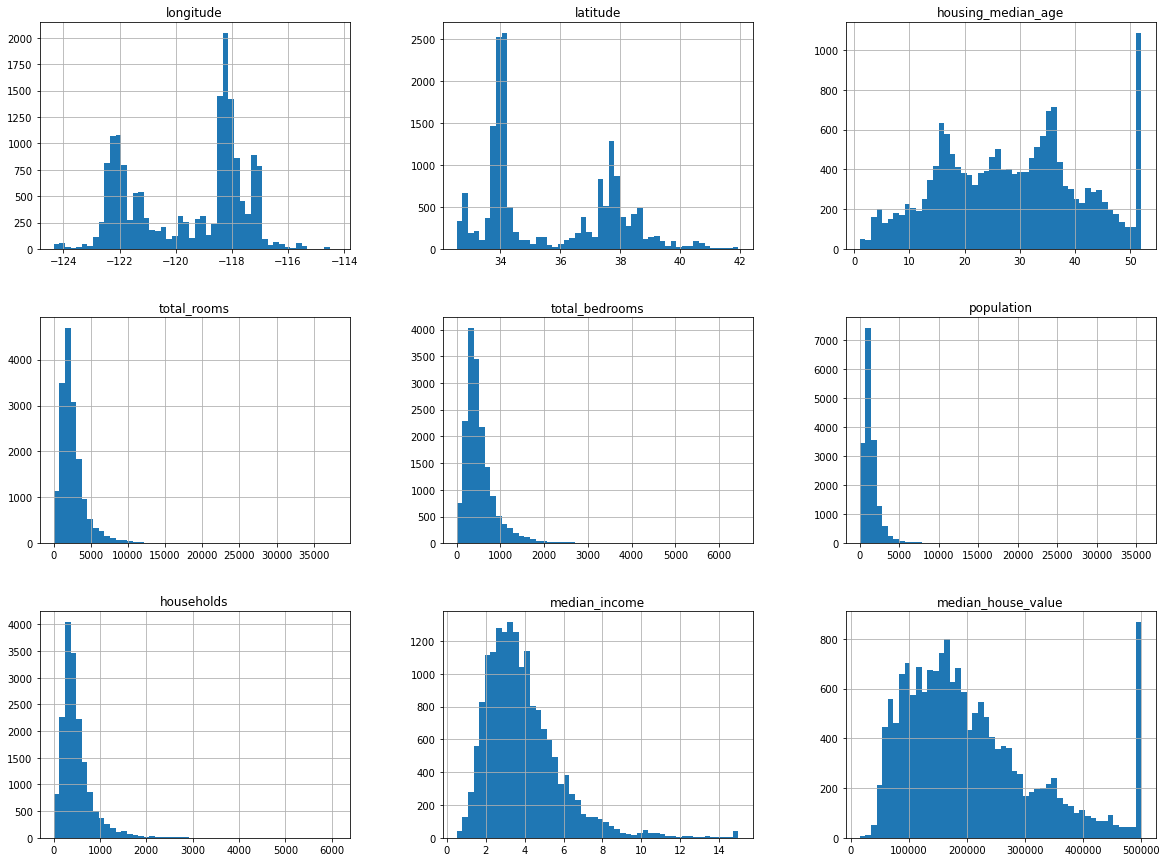

In [ ]:
df.hist(bins=50,figsize=(20,15))

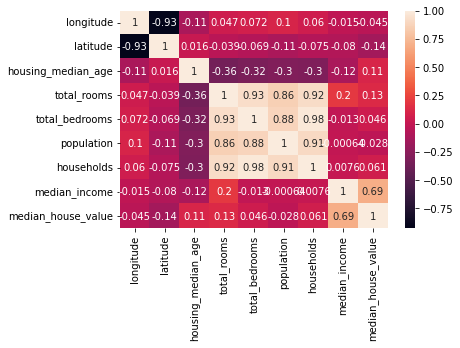

In [ ]:
c = sns.heatmap(df.corr(),annot=True)

In [ ]:
x_cols=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']
y_col = ['median_house_value']

In [ ]:
class TabularDataset(Dataset):
  def __init__(self,df):
    self.df = df
  def __len__(self):
    return len(self.df)
  def __getitem__(self,idx):
    x = self.df[x_cols].iloc[idx].values
    y = self.df[y_col].iloc[idx].values
    return x,y

In [ ]:
dataset = TabularDataset(df)
dataset[0]

(array([-114.31,   34.19,   15.  , 5612.  , 1283.  ]), array([66900.]))

In [ ]:
from torch.utils.data import DataLoader
x = DataLoader(df,batch_size = 1, shuffle = False,num_workers=0,collate_fn=None,pin_memory=False)
print(x)